In [132]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report


#NOTE:
#may be a good thought to bring in region into the model, the region of the wine could be significant in determining quality, possible turning region into blobs


In [133]:
#read in all the data!
data = pd.read_csv('../Resources/winemag-data_first150k.csv');

#see info
data.shape
xcol='description'


,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...,...
150925,150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [134]:
#drop dups and nans
parsed = data[data.duplicated(xcol, keep=False)]
parsed.shape

(92383, 11)

In [135]:
parsed.dropna(subset=[xcol, 'points'], inplace=True)
parsed.shape

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


(76526, 11)

In [136]:
dp = parsed[[xcol, 'points']]
dp

,region_1,description,points
29,Walla Walla Valley (WA),This standout Rocks District wine brings earth...,94
60,Mendoza,"Concentrated, ripe blackberry and cassis aroma...",91
61,Mornington Peninsula,Moorooduc's estate Pinot Noir is a solid value...,91
62,Mendoza,Smoky aromas of fresh-cut wood blend with berr...,91
63,Chablis,L'Homme Mort is a northern extension of the Fo...,91
...,...,...,...
150925,Fiano di Avellino,Many people feel Fiano represents southern Ita...,91
150926,Champagne,"Offers an intriguing nose with ginger, lime an...",91
150927,Fiano di Avellino,This classic example comes from a cru vineyard...,91
150928,Champagne,"A perfect salmon shade, with scents of peaches...",90


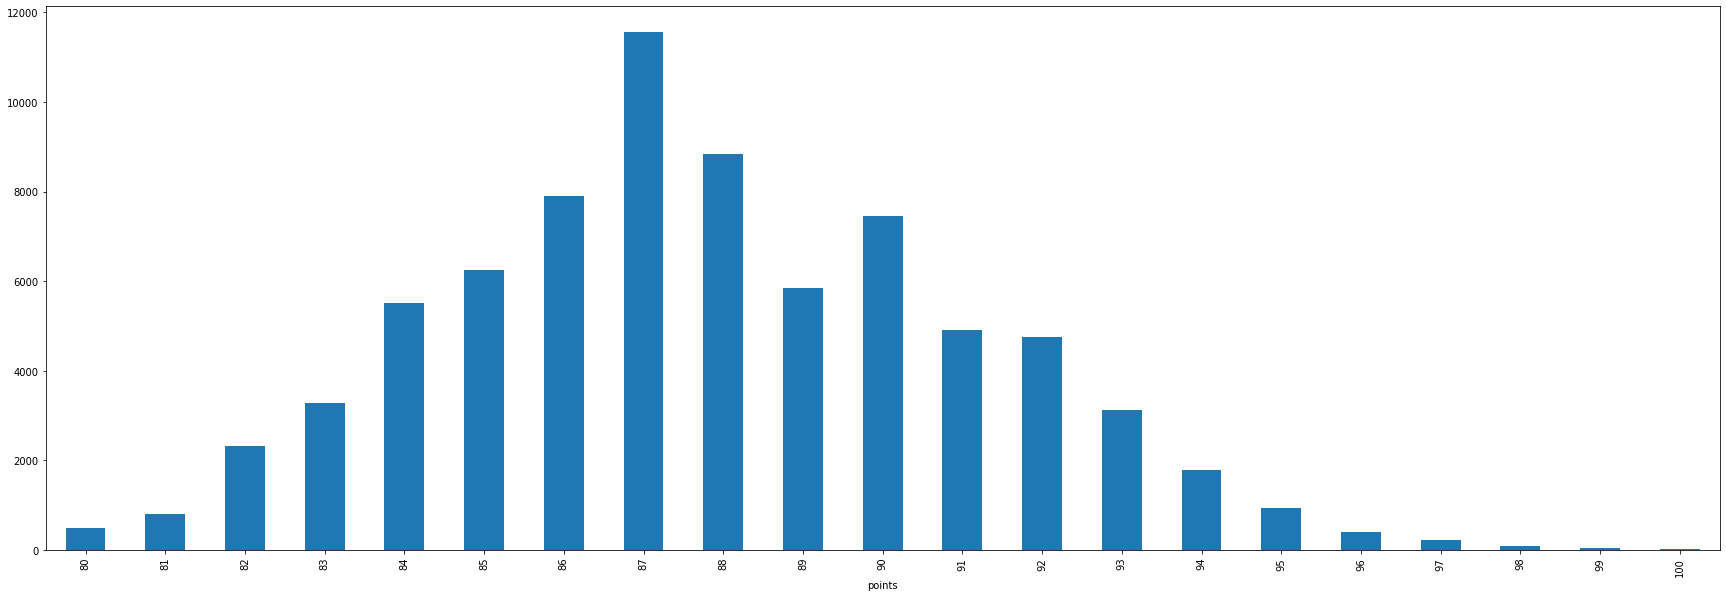

In [137]:
#visualize some wine data
fix, ax = plt.subplots(figsize=(30, 10))
dp.groupby('points').count()[xcol].plot(ax=ax, kind='bar')

In [173]:
dp['description_len'] = dp['description'].apply(len)
dp

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_1,description,points,description_len,simple_points
29,Walla Walla Valley (WA),This standout Rocks District wine brings earth...,94,333,4
60,Mendoza,"Concentrated, ripe blackberry and cassis aroma...",91,242,3
61,Mornington Peninsula,Moorooduc's estate Pinot Noir is a solid value...,91,315,3
62,Mendoza,Smoky aromas of fresh-cut wood blend with berr...,91,229,3
63,Chablis,L'Homme Mort is a northern extension of the Fo...,91,330,3
...,...,...,...,...,...
150925,Fiano di Avellino,Many people feel Fiano represents southern Ita...,91,285,3
150926,Champagne,"Offers an intriguing nose with ginger, lime an...",91,266,3
150927,Fiano di Avellino,This classic example comes from a cru vineyard...,91,397,3
150928,Champagne,"A perfect salmon shade, with scents of peaches...",90,253,3


In [174]:
#change ratings to a 1 to 5

def simplify_points(points):
    if points < 84:
        return 1
    elif points >=84 and points < 88:
        return 2
    elif points >= 88 and points < 92:
        return 3
    elif points >= 92 and points < 96:
        return 4
    else:
        return 5


In [175]:
dp['simple_points'] = dp.points.apply(simplify_points)
dp.sort_values(by='simple_points', ascending=False)

C:\Users\Miguel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,region_1,description,points,description_len,simple_points
14574,Anderson Valley,"A spectacular Pinot, continuing a string of gr...",97,393,5
137370,Columbia Valley (WA),The 2006 flagship Cabernet from Quilceda Creek...,98,562,5
121504,Green Valley,This distinctive Pinot Noir's source is a tiny...,97,436,5
121505,Savennières-Coulée de Serrant,It is not easy to describe one of the majestic...,96,384,5
121506,Walla Walla Valley (WA),"This full-throttle Bordeaux blend is big, tigh...",96,364,5
...,...,...,...,...,...
135706,Mendoza,Rowdy and aggressive stuff; where's the charm ...,80,202,1
18467,Campo de Borja,"Gritty, toasty and burnt smelling, with stalky...",83,246,1
18468,Cariñena,"This is lightly baked and sweet on the nose, w...",83,226,1
18469,California,"Tough and gritty, this Zinfandel-based blend h...",83,154,1


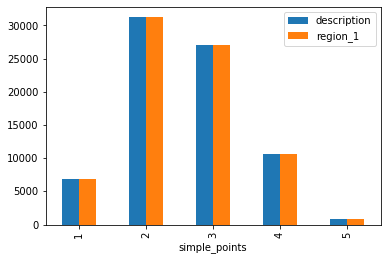

In [159]:
dp.groupby('simple_points').count()[xcol].plot(kind='bar')

In [187]:
#vectorization

X = dp[xcol]
y = dp['simple_points']
    

In [188]:
vectorizer = CountVectorizer()
vectorizer.fit(X)

CountVectorizer()

In [189]:
X = vectorizer.transform(X)
print(X)
print(X.shape[0])
print(y.shape)

  (0, 913)	1
  (0, 963)	1
  (0, 966)	2
  (1, 545)	1
  (2, 594)	1
  (2, 676)	1
  (3, 545)	1
  (4, 173)	1
  (5, 211)	1
  (5, 805)	1
  (5, 913)	1
  (6, 173)	1
  (7, 616)	1
  (7, 913)	1
  (8, 28)	1
  (8, 318)	1
  (8, 413)	1
  (9, 785)	1
  (10, 406)	1
  (10, 848)	1
  (11, 221)	1
  (11, 841)	1
  (12, 73)	1
  (13, 913)	1
  (13, 969)	1
  :	:
  (76511, 221)	1
  (76511, 628)	1
  (76512, 616)	1
  (76512, 913)	1
  (76513, 179)	1
  (76514, 179)	1
  (76515, 179)	1
  (76516, 889)	1
  (76517, 179)	1
  (76518, 225)	1
  (76518, 279)	1
  (76518, 355)	1
  (76518, 654)	1
  (76519, 179)	1
  (76520, 179)	1
  (76521, 58)	1
  (76521, 286)	1
  (76521, 334)	1
  (76522, 179)	1
  (76523, 58)	1
  (76523, 286)	1
  (76523, 334)	1
  (76524, 179)	1
  (76525, 4)	1
  (76525, 23)	1
76526
(76526,)


In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=101)
rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [180]:
predictions = rfc.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       0.54      0.03      0.05       727
           2       0.54      0.72      0.62      3154
           3       0.51      0.55      0.53      2662
           4       0.43      0.24      0.31      1041
           5       1.00      0.03      0.06        69

    accuracy                           0.52      7653
   macro avg       0.61      0.31      0.31      7653
weighted avg       0.52      0.52      0.49      7653

